## Solar abundances
this is a very important input into chemical evolution models. Even more since in Chempy we use solar abundances to constrain Milky Way parameters. We will show how Chempy handles the solar abundances and how different authors compare to each other.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Chempy.parameter import ModelParameters
from Chempy.solar_abundance import solar_abundances

In [3]:
a = ModelParameters() # This loads the default parameters, you can check and change them in paramter.py

## Implemented solar abundance tables

In [4]:
print(a.solar_abundance_name_list) # These are the implemented solar abundances

['Lodders09', 'Asplund09', 'Asplund05_pure_solar', 'Asplund05_apogee_correction']


In [5]:
basic_solar = solar_abundances()
getattr(basic_solar, a.solar_abundance_name)() # First we load the default solar abundances from Asplund 2009

## Fractions of the Sun

In [6]:
basic_solar.x # The Hydrogen fraction

0.73739776788034606

In [7]:
basic_solar.y # The Helium fraction

0.24923529618045798

In [8]:
basic_solar.z # The metallicity (all elements heavier than Helium)

0.013366935939195926

## A list of all elements and their fractions/abundances

In [14]:
print('#, Symbol, Mass fraction, Photospheric abundance, Error')
txt = "{0:3s}   {1:3d}  {2:.11f}  {3:.8f}      {4:.8f}"
for i,item in enumerate(basic_solar.all_elements[:30]): # Here the content of basic_solar is illustrated
    print(txt.format(item.decode('utf8'), 
                     i+1, 
                     basic_solar.fractions[i],
                     basic_solar.table['photospheric'][i], 
                     basic_solar.table['error'][i]))

#, Symbol, Mass fraction, Photospheric abundance, Error
H       1  0.73739776788  12.00000000      0.00000000
He      2  0.24923529618  10.93000000      0.01000000
Li      3  0.00000000924  3.26000000      0.05000000
Be      4  0.00000000013  1.30000000      0.03000000
B       5  0.00000000488  2.79000000      0.04000000
C       6  0.00236502348  8.43000000      0.05000000
N       7  0.00069279216  7.83000000      0.05000000
O       8  0.00573285338  8.69000000      0.05000000
F       9  0.00000036560  4.42000000      0.06000000
Ne     10  0.00125655599  7.93000000      0.10000000
Na     11  0.00002922818  6.24000000      0.04000000
Mg     12  0.00070788509  7.60000000      0.04000000
Al     13  0.00005563318  6.45000000      0.03000000
Si     14  0.00066488923  7.51000000      0.03000000
P      15  0.00000582453  5.41000000      0.03000000
S      16  0.00030924194  7.12000000      0.03000000
Cl     17  0.00000440474  5.23000000      0.06000000
Ar     18  0.00007341118  6.40000000     

## Visualization of the famous Solar abundances pattern

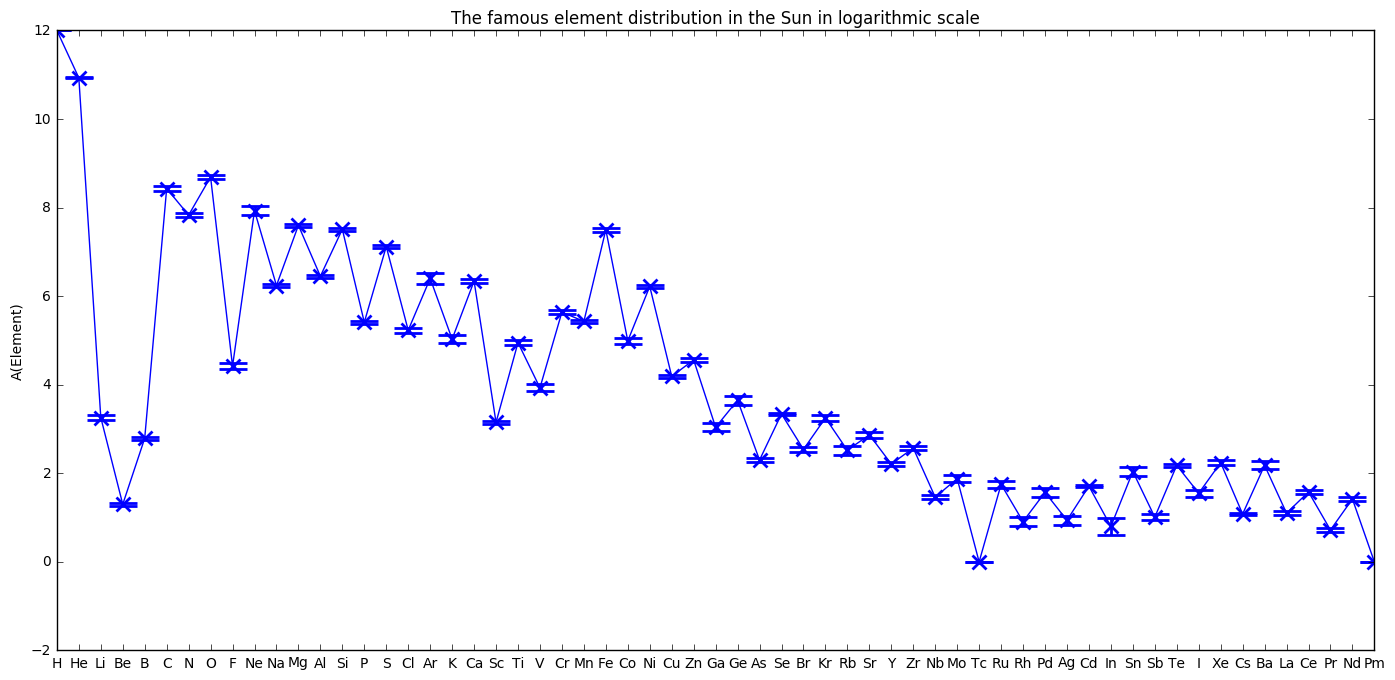

In [23]:
symbols = np.array([k.decode('utf8') for k in np.hstack(basic_solar.all_elements)])
fig = plt.figure(figsize=(17,8), dpi=300)
ax1 = fig.add_subplot(111)
ax1.errorbar(np.arange(len(symbols)),
             basic_solar.table['photospheric'],
             xerr=None, 
             yerr=basic_solar.table['error'],
             linestyle='-', marker='x', capthick=2, capsize=10, 
             ms=10, markeredgewidth=2, color='b',
             elinewidth=2,label='Solar abundances')
plt.xticks(np.arange(len(symbols)), symbols)
plt.xlim((0,60))
plt.ylabel("A(Element)")
plt.title("The famous element distribution in the Sun in logarithmic scale");

In [24]:
j = np.argsort(basic_solar.fractions)[::-1] # We sort the elements for their masses

## Elements sorted by their Solar mass fraction.

In [25]:
print('Symbol, Mass fraction') # and get a list of top 20 most abundant elements in the Sun
for i,item in enumerate(symbols[j][:20]):
    print('{0:3d}'.format(i+1), '{0:3s}'.format(item),'{0:.11f}'.format(basic_solar.fractions[j][i]))
          #,basic_solar.table['photospheric'][j][i],basic_solar.table['error'][j][i]


Symbol, Mass fraction
  1 H   0.73739776788
  2 He  0.24923529618
  3 O   0.00573285338
  4 C   0.00236502348
  5 Fe  0.00129196704
  6 Ne  0.00125655599
  7 Mg  0.00070788509
  8 N   0.00069279216
  9 Si  0.00066488923
 10 S   0.00030924194
 11 Ar  0.00007341118
 12 Ni  0.00007126174
 13 Ca  0.00006414653
 14 Al  0.00005563318
 15 Na  0.00002922818
 16 Cr  0.00001660496
 17 Mn  0.00001081783
 18 P   0.00000582453
 19 Cl  0.00000440474
 20 Co  0.00000421335


## Comparison of the metallicity from different authors

In [26]:
basic_solar_lodders = solar_abundances() # The same functionality is available for the other solar abundances
getattr(basic_solar_lodders, 'Lodders09')()
basic_solar_asplund05 = solar_abundances() # We load three solar abundances and compare their metallicities
basic_solar_asplund05.Asplund05_pure_solar()

In [27]:
print('{0:2f}'.format(basic_solar.z), '{0:2f}'.format(basic_solar_lodders.z), '{0:2f}'.format(basic_solar_asplund05.z))

0.013367 0.014031 0.012205


## Comparison of different Solar abundance patterns

/Users/fouesneau/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs ['mew', 'markeredgewidth'] which are all aliases for 'markeredgewidth'.  Kept value from 'markeredgewidth'
  seen=seen, canon=canonical, used=seen[-1]))


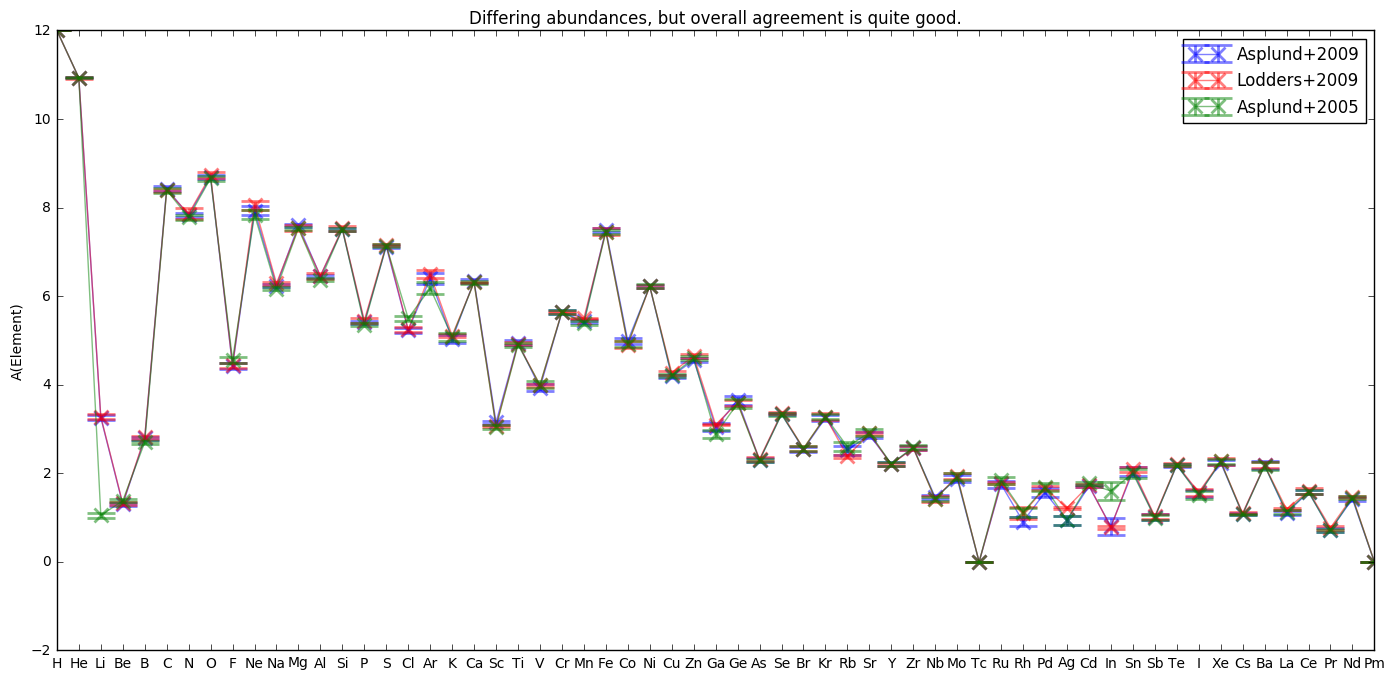

In [28]:
fig = plt.figure(figsize=(17,8), dpi=300)
ax1 = fig.add_subplot(111)
ax1.errorbar(np.arange(len(symbols)), basic_solar.table['photospheric'], xerr=None, yerr=basic_solar.table['error'],  alpha=0.5,  linestyle='-', marker='x', capthick =2, capsize=10,  ms=10,  mew=2,  color='b', elinewidth=2, label= 'Asplund+2009')
ax1.errorbar(np.arange(len(symbols)), basic_solar_lodders.table['photospheric'], xerr=None, yerr=basic_solar_lodders.table['error'],  alpha=0.5,  linestyle='-', marker='x', capthick =2, capsize=10,  ms=10,  mew=2,  color='r', elinewidth=2, label= 'Lodders+2009')
ax1.errorbar(np.arange(len(symbols)), basic_solar_asplund05.table['photospheric'], xerr=None, yerr=basic_solar_asplund05.table['error'],  alpha=0.5,  linestyle='-', marker='x', capthick =2, capsize=10,  ms=10,  mew=2,  color='g', elinewidth=2, label= 'Asplund+2005')
plt.xticks(np.arange(len(symbols)), symbols)
plt.xlim((0,60))
plt.ylabel("A(Element)")
plt.title("Differing abundances, but overall agreement is quite good.")
plt.legend();

/Users/fouesneau/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs ['mew', 'markeredgewidth'] which are all aliases for 'markeredgewidth'.  Kept value from 'markeredgewidth'
  seen=seen, canon=canonical, used=seen[-1]))


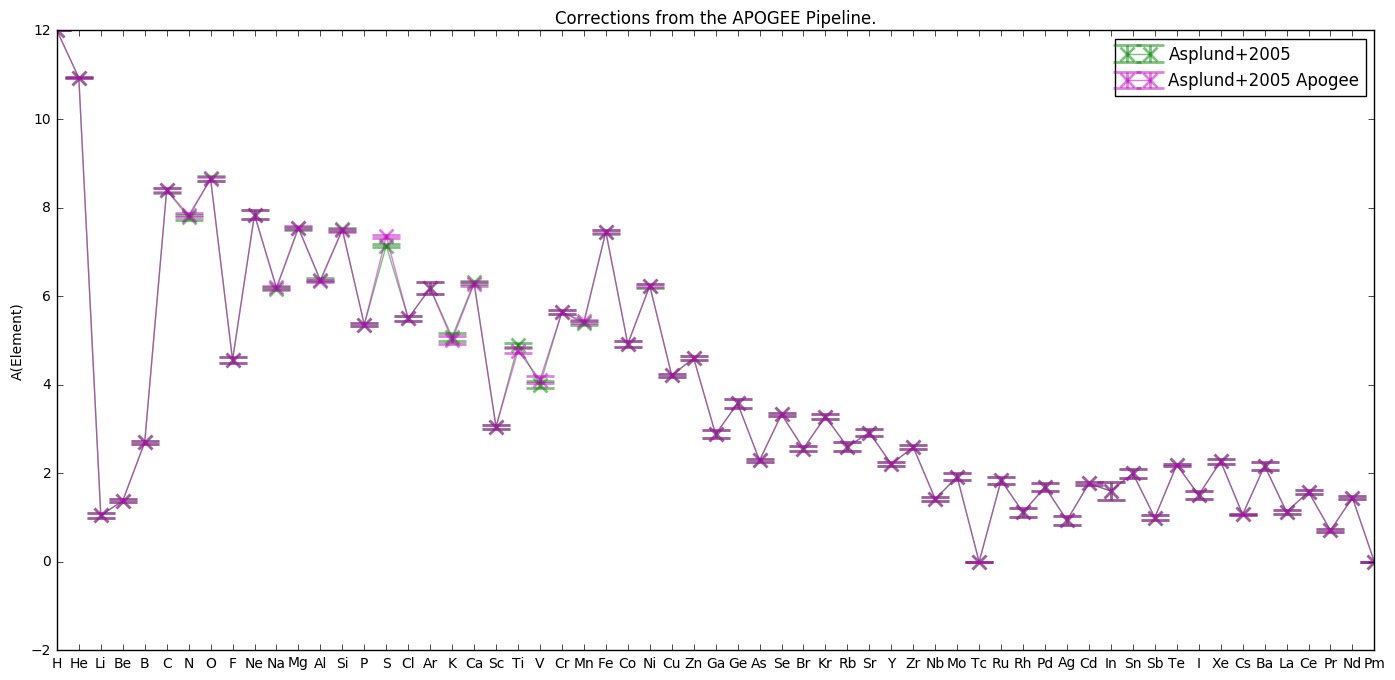

In [29]:
basic_solar_apogee = solar_abundances()
getattr(basic_solar_apogee, 'Asplund05_apogee_correction')()

fig = plt.figure(figsize=(17, 8), dpi=300)
ax1 = fig.add_subplot(111)
ax1.errorbar(np.arange(len(symbols)),basic_solar_asplund05.table['photospheric'],xerr=None,yerr=basic_solar_asplund05.table['error'], alpha = 0.5, linestyle = '-',marker='x',capthick =2,capsize = 10, ms = 10, mew = 2, color = 'g',elinewidth=2,label= 'Asplund+2005')
ax1.errorbar(np.arange(len(symbols)),basic_solar_apogee.table['photospheric'],xerr=None,yerr=basic_solar_apogee.table['error'], alpha = 0.5, linestyle = '-',marker='x',capthick =2,capsize = 10, ms = 10, mew = 2, color = 'm',elinewidth=2,label= 'Asplund+2005 Apogee')

plt.xticks(np.arange(len(symbols)), symbols)
plt.xlim((0,60))
plt.ylabel("A(Element)")
plt.title("Corrections from the APOGEE Pipeline.")
plt.legend();

## Solar scaled material
Sometimes it is handy to have solar scaled material but at a different metallicity

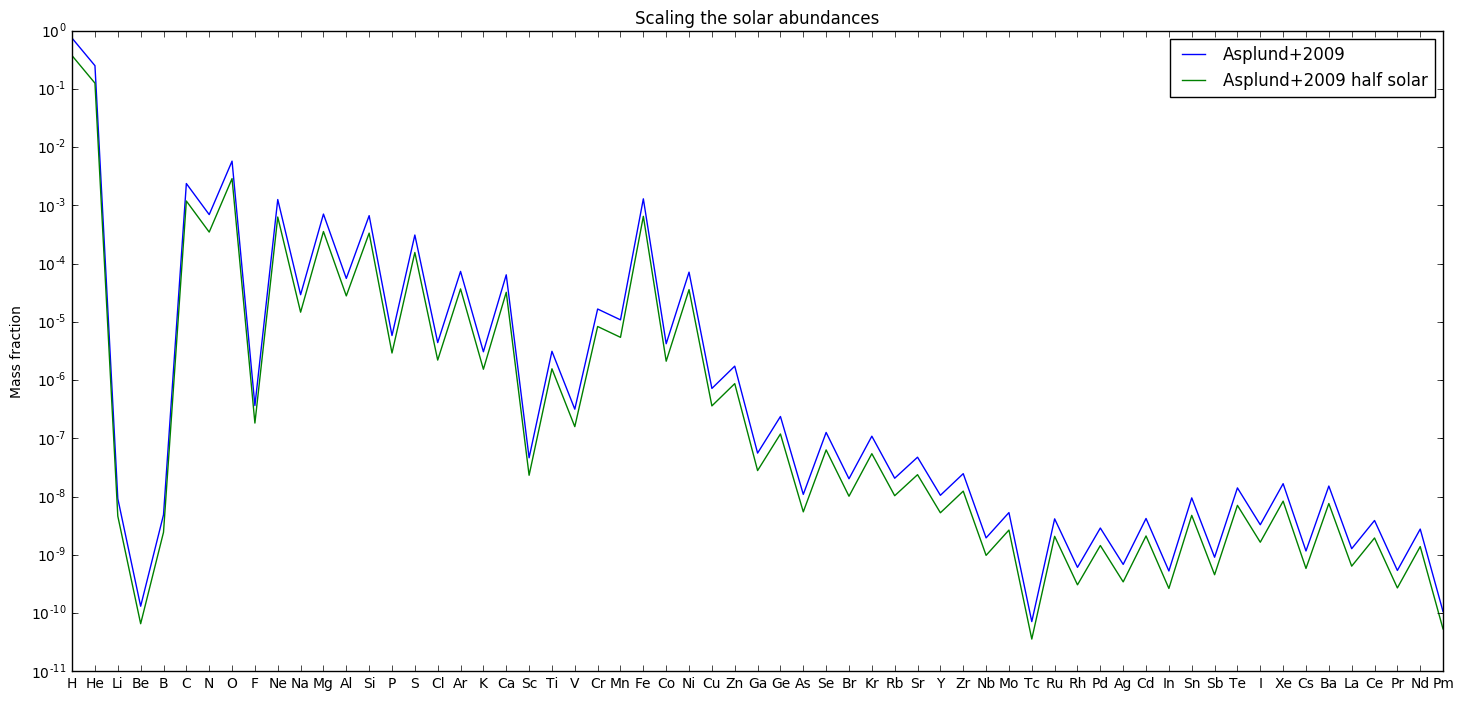

In [32]:
from Chempy.infall import INFALL, PRIMORDIAL_INFALL
solar_scaled_material = PRIMORDIAL_INFALL(list(basic_solar.all_elements),np.copy(basic_solar.table))
solar_scaled_material.solar(-0.3)
fig = plt.figure(figsize=(17.69,8.27), dpi=300)
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(len(symbols)),basic_solar.fractions,label= 'Asplund+2009')
ax1.plot(np.arange(len(symbols)),solar_scaled_material.fractions, label= 'Asplund+2009 half solar')

plt.xticks(np.arange(len(symbols)), symbols)
plt.xlim((0,60))
plt.ylabel("Mass fraction")
plt.yscale('log')
plt.title("Scaling the solar abundances")
plt.legend();